In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("bank-full.csv",sep=";")

In [ ]:

#with open("bank-names.txt","r") as f:
  #d = f.read()
  #print(d)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.describe()

#1. count in all the row are same , it means no missing values..... later i also confirm with by using the .isnull().sum()
#2. diference between mean value and median (50%) is just 1 (40.936210- 39,000000).. data is not skewed
#3. range that is max - min is high...in  required scaling of the data.........
#4. 75% and max .......... difference is higher so that means.. ouliers are present


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data["y"].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print(data[numeric_features].describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_features:
    print(f"{col} unique values: {data[col].unique()}")
    print(data[col].value_counts())
    print("------")

job unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------
marital unique values: ['married' 'single' 'divorced']
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------
education unique values: ['tertiary' 'secondary' 'unknown' 'primary']
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
------
default unique values: ['no' 'yes']
default
no     44396
yes      815
Name: count, dtype: int64
------
housing unique values: ['yes' 'no']
housing
yes    25130
no     20081
Name: count, dtype

In [ ]:
data["y"] = data["y"].map({'yes':1,'no':0})

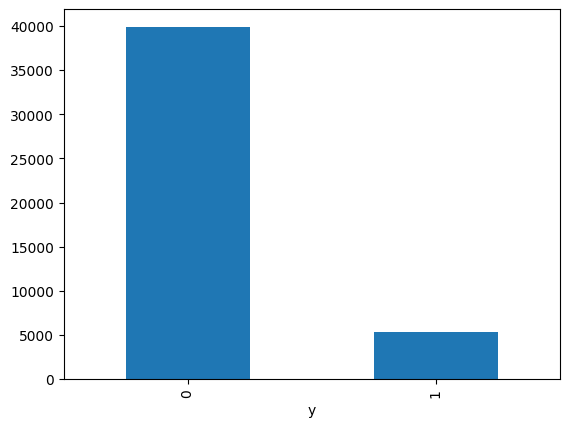

In [ ]:
import matplotlib.pyplot as plt

data['y'].value_counts().plot(kind='bar')
plt.show()

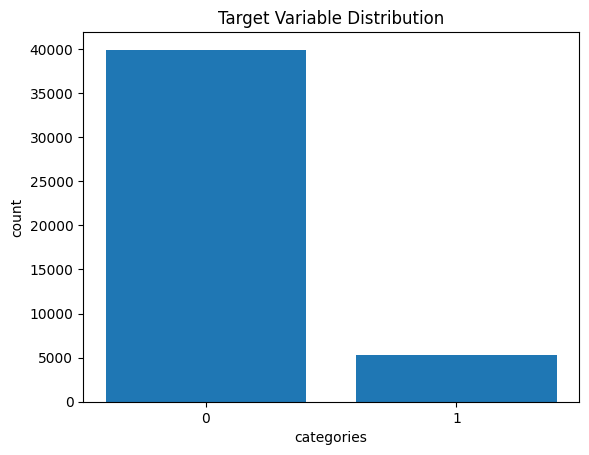

In [ ]:

count = data["y"].value_counts()
plt.bar(count.index.astype(str),count.values)
plt.xlabel("categories")
plt.ylabel("count")
plt.title("Target Variable Distribution")
plt.show()


/tmp/ipython-input-2292822962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


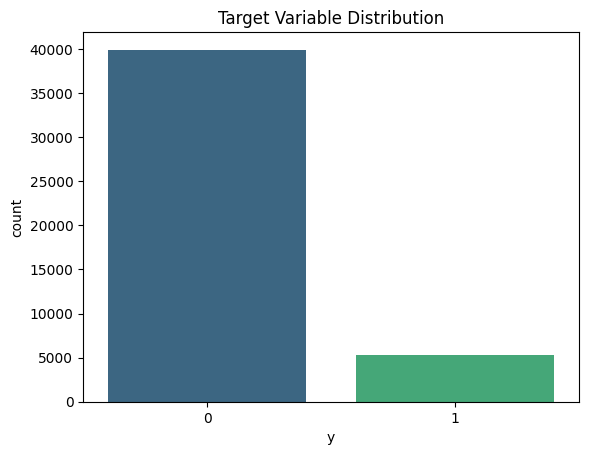

In [ ]:
import seaborn as sns
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.show()

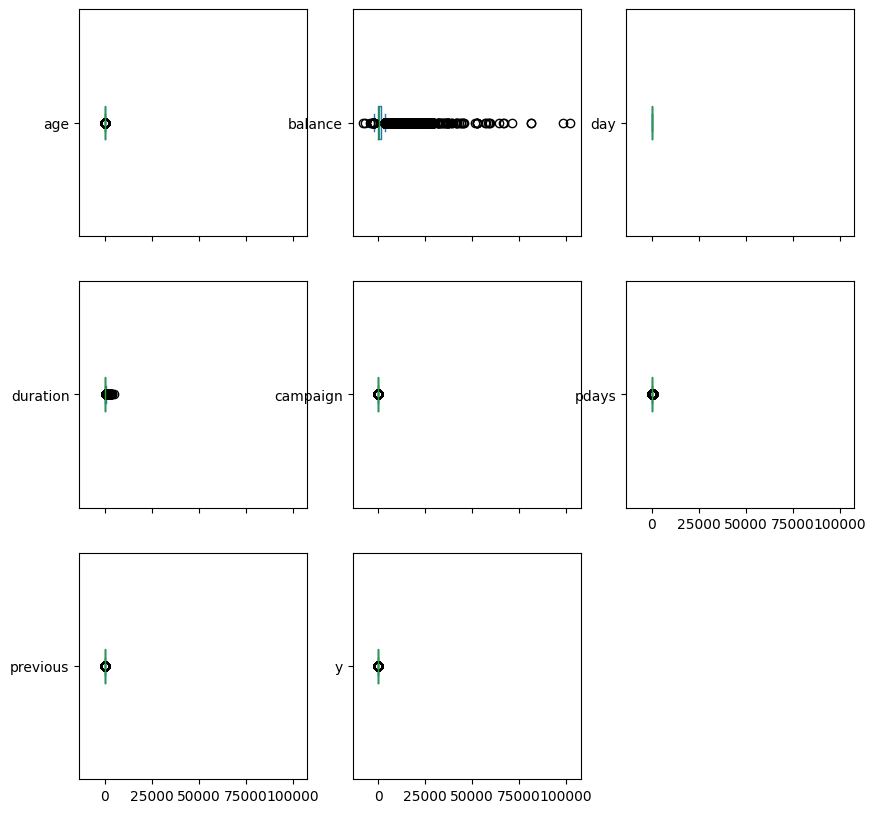

In [ ]:
#sns.boxplot(data=data,orient="h")
#plt.title("bolxplot")
#plt.show()

data.plot(kind="box",subplots=True,layout=(3,3),figsize=(10,10),vert=False)
plt.show()

--------------------------Data preparataion part----------------

In [ ]:
col_name = data.columns.tolist()

In [ ]:
#categorical_col = data.select_dtypes(exclude=["number"]).columns.tolist()
# if after this (above code) conversion of the categorial value still if some vaues are left..... like in this case True/False value..
# use the below code to convert the values..... fo bool in this case to inf for .....correct result.... then apply the above code

bool_value = data.select_dtypes(include=["bool"]).columns.tolist()

data[bool_value] = data[bool_value].astype(int)

categorical_col = data.select_dtypes(exclude=["number"]).columns.tolist()

data = pd.get_dummies(data,columns=categorical_col,drop_first=True)

data

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data[numeric_cols]

data

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
x = data.drop("y",axis=1)
y = data["y"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size =0.2,random_state=42)
x_train.dtypes

,0
age,float64
balance,float64
day,float64
duration,float64
campaign,float64
pdays,float64
previous,float64
job_blue-collar,int64
job_entrepreneur,int64
job_housemaid,int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply only to training data
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

print("Before Resampling:", y_train.value_counts())
print("After Resampling:", y_train_resampled.value_counts())

Before Resampling: y
0    31970
1     4198
Name: count, dtype: int64
After Resampling: y
0    31970
1    31970
Name: count, dtype: int64


In [ ]:
import torch

x_train = torch.tensor(x_train_resampled.values,dtype = torch.float32)
x_test = torch.tensor(x_test.values,dtype = torch.float32)
y_train = torch.tensor(y_train_resampled.values,dtype = torch.float32).view(-1,1)
y_test = torch.tensor(y_test.values,dtype = torch.float32).view(-1,1)

In [ ]:
import torch.nn as nn
import torch.optim as optim

input_dim = x_train.shape[1]

model = nn.Linear(input_dim,1)


Loss = nn.BCELoss()
#optimer = optim.SGD(model.parameters(),lr=0.01)
optimer = optim.Adam(model.parameters(),lr=0.01)
epochs = 1500

for epoch in range(epochs):
  y_pred = torch.sigmoid(model(x_train))

  loss = Loss(y_pred,y_train)

  optimer.zero_grad()

  loss.backward()

  optimer.step()

  if epoch % 100 == 0:
    print(f"epoch is {epoch} and loss is {loss}")


epoch is 0 and loss is 0.7426260709762573
epoch is 100 and loss is 0.4504534900188446
epoch is 200 and loss is 0.4104019105434418
epoch is 300 and loss is 0.4002102017402649
epoch is 400 and loss is 0.39980772137641907
epoch is 500 and loss is 0.4015260338783264
epoch is 600 and loss is 0.4012698829174042
epoch is 700 and loss is 0.4012029767036438
epoch is 800 and loss is 0.4011819362640381
epoch is 900 and loss is 0.4011738896369934
epoch is 1000 and loss is 0.40117335319519043
epoch is 1100 and loss is 0.4011724293231964
epoch is 1200 and loss is 0.4011729955673218
epoch is 1300 and loss is 0.4011729955673218
epoch is 1400 and loss is 0.4011728763580322


In [ ]:
with torch.no_grad():
  y_pred_test = torch.sigmoid(model(x_test))
  y_pred_class = y_pred_test.round()


In [ ]:
weights = model.weight.data.numpy()
bias = model.bias.data.numpy()


print("Model weights :", weights)
print("Bias:", bias)

Model weights : [[ 0.03900117  0.0492527   0.03912018  1.5460389  -0.31490293 -0.05230474
   0.0763506  -0.39344314 -0.3657385  -0.5130238  -0.1915888   0.1877096
  -0.28743654 -0.21725588  0.45927685 -0.19265944 -0.15310143 -0.45313552
  -0.20645119  0.16473296  0.19957955  0.44734347  0.2812676  -0.08188615
  -0.74025303 -0.50873005  0.02525094 -1.6720407  -0.9238142   0.4955469
  -0.27102384 -1.346232   -1.162337    0.15590976  1.7400031  -0.85021085
  -1.0516876   1.1651051   0.9205035   0.20195399  2.3824804  -0.3015535 ]]
Bias: [0.69799256]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class)

print("Accuracy:", accuracy)

Accuracy: 0.8425301338051532


In [ ]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Print the matrix
print("Confusion Matrix:\n", cm)

# Extract values
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Print each value clearly
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)



Confusion Matrix:
 [[6711 1241]
 [ 183  908]]

True Negative (TN): 6711
False Positive (FP): 1241
False Negative (FN): 183
True Positive (TP): 908


np.float64(0.8425301338051532)

In [ ]:
sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      7952
         1.0       0.42      0.83      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043

